## Q1. What are the key features of the wine quality data set? Discuss the importance of each feature inpredicting the quality of wine.

In [5]:
import pandas as pd
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Q2. How did you handle missing data in the wine quality data set during the feature engineering process?Discuss the advantages and disadvantages of different imputation techniques.

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Insights

**There is no such missing value in the dataset.

dropna() has some pros and cons.

Pros

Straightforward and simple to use.

Beneficial when missing values have no importance.

Cons

Using this approach can lead to information loss, which can introduce bias to the final dataset.

This is not appropriate when the data is not missing completely at random.

Data set with a large proportion of missing value can be significantly decreased, which can impact the result of all statistical analysis on that data set.

Mean - Median Imputation
Pros

Simplicity and ease of implementation are some of the benefits of the mean and median imputation.

The imputation is performed using the existing information from the non-missing data; hence no additional data is required.

Mean and median imputation can provide a good estimate of the missing values, respectively for normally distributed data, and skewed data.

Cons

We cannot apply these two strategies to categorical columns. They can only work for numerical ones.

Mean imputation is sensitive to outliers and may not be a good representation of the central tendency of the data. Similarly to the mean, the median also may not better represent the central tendency.

Median imputation makes the assumption that the data is missing completely at random (MCAR), which is not always true.

Random-Sample imputation
Pros

This is an easy and straightforward technique.

It tackles both numerical and categorical data types.

There is less distortion in data variance, and it also preserves the original distribution of the data, which is not the case for mean, median, and more.

Cons

The randomness does not necessarily work for every situation, and this can infuse noise in the data, hence leading to incorrect statistical conclusions.

Similarly to the mean and median, this approach also assumes that the data is missing completely at random (MCAR).

Multiple-Imputation
Pros

Multiple imputation is powerful at dealing with missing data in multiple variables and multiple data types.

The approach can produce much better results than mean and median imputations.

Many other algorithms, such as K-Nearest Neighbors, Random forest, and neural networks, can be used as the backbone of the multiple imputation prediction for making predictions.
Cons

Multiple imputation assumes that the data is missing at random (MAR).

Despite all the benefits, this approach can be computationally expensive compared to other techniques, especially when working with large datasets.

This approach requires more effort than the previous ones.

## Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

In [8]:
import pandas as pd
df1=pd.read_csv("stud.csv")
[factors for factors in df1.columns if df1[factors].dtype=="O"]

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [9]:
df1.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
### Segregrate numerical and categorical features

In [12]:
numerical_features=[factors for factors in df1.columns if df1[factors].dtype!="O"]
categorical_features=[factors for factors in df1.columns if df1[factors].dtype=="O"]

In [13]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [14]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [15]:
## Aggregate the total score with mean

df1['total_score']=(df1['math_score']+df1['reading_score']+df1['writing_score'])
df1['average']=df1['total_score']/3
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


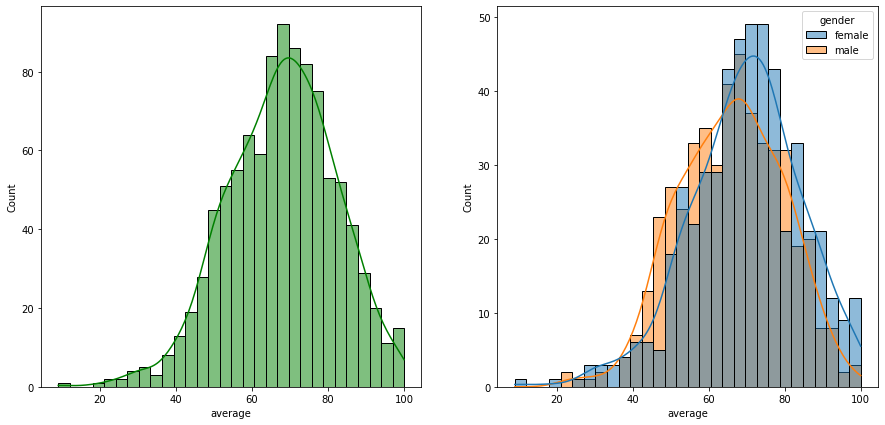

In [16]:
## Explore More Visualization
import seaborn as sns
import matplotlib.pyplot as plt
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df1,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df1,x='average',bins=30,kde=True,hue='gender')
plt.show()

## Insights

Female student tend to perform well than male students

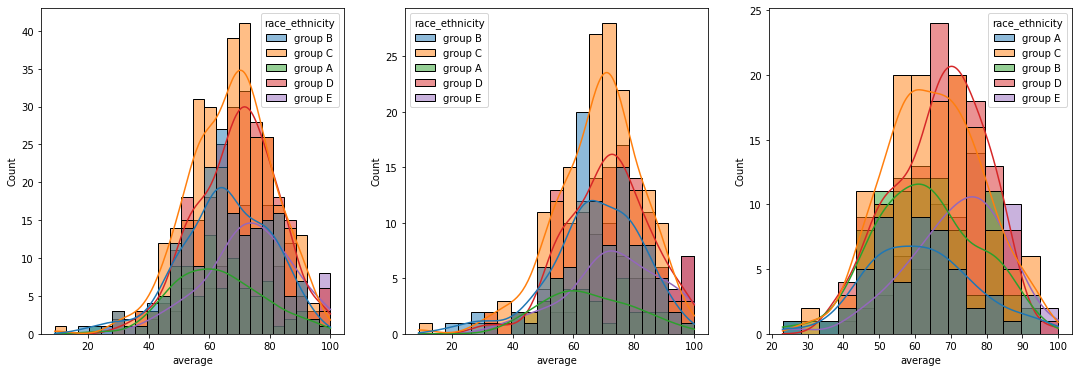

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df1,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df1[df1.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df1[df1.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

## Insights

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

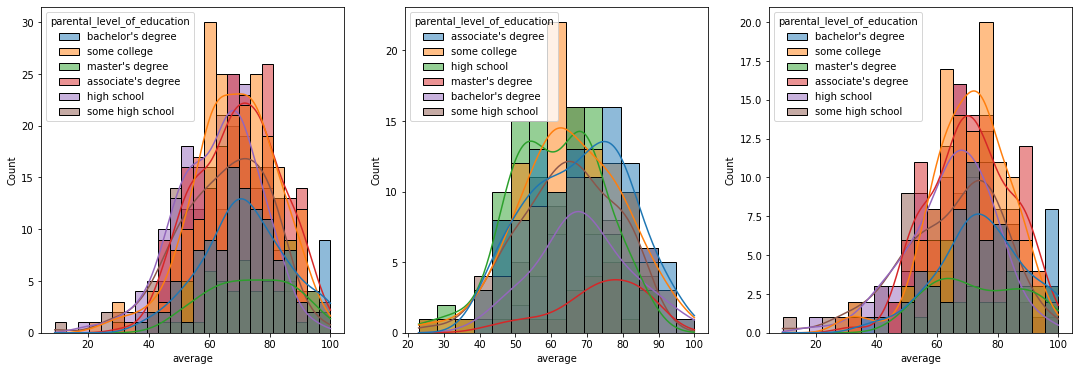

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df1,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df1[df1.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df1[df1.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

## Insights

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.


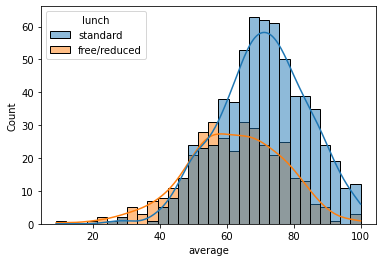

In [20]:
sns.histplot(data=df1,x='average',bins=30,kde=True,hue='lunch')
plt.show()

## Average of standard lunch taking students is higher 

### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

In [21]:
import numpy as np

In [22]:
df1["race_ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [23]:
df1["race_ethnicity"]=df1["race_ethnicity"].map({"group A":0,"group B":1,"group C":2,"group D":3,"group E":4})

In [24]:
df1["race_ethnicity"]

0      1
1      2
2      1
3      0
4      2
      ..
995    4
996    2
997    2
998    3
999    3
Name: race_ethnicity, Length: 1000, dtype: int64

In [25]:
df1["parental_level_of_education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [26]:
df1["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [27]:
df1["test_preparation_course"].unique()

array(['none', 'completed'], dtype=object)

In [28]:
df1["parental_level_of_education"]=df1["parental_level_of_education"].map({"high school":0,"some high school":1,"some college":2,"bachelor's degree":3,"master's degree":4,"associate's degree":5,np.nan:2})

In [29]:
df1["lunch"]=df1["lunch"].map({'standard':1,'free/reduced':2})

In [30]:
df1["test_preparation_course"]=df1["test_preparation_course"].map({"none":0,'completed':1})

In [31]:
df1["gender"]=df1["gender"].map({"male":0,"female":1})

In [32]:
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,1,1,3,1,0,72,72,74,218,72.666667
1,1,2,2,1,1,69,90,88,247,82.333333
2,1,1,4,1,0,90,95,93,278,92.666667
3,0,0,5,2,0,47,57,44,148,49.333333
4,0,2,2,1,0,76,78,75,229,76.333333


## Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distributionof each feature. Which feature(s) exhibit non-normality, and what transformations could be applied tothese features to improve normality?

In [33]:
df2=pd.read_csv("winequality-red.csv")

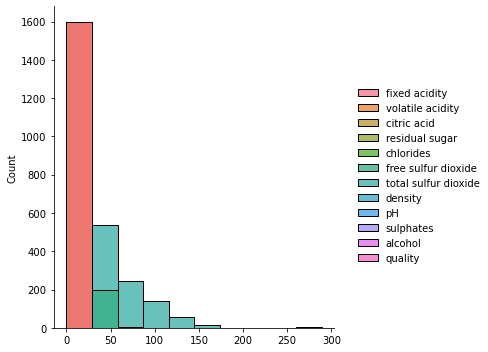

In [34]:
sns.displot(df2,bins=10)

### Insight

Volatile acidity is maximum in  wine

In [36]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import scipy.stats as stat
import pylab

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

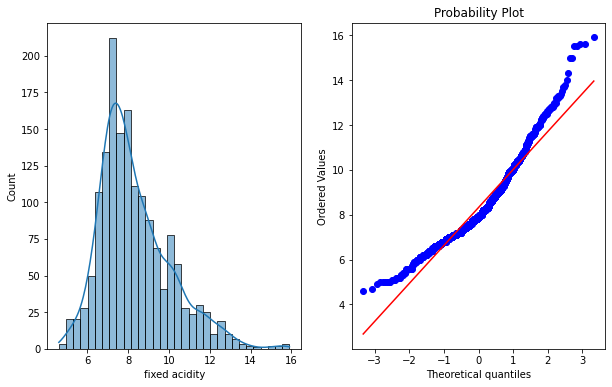

In [37]:
plot_data(df2,"fixed acidity")

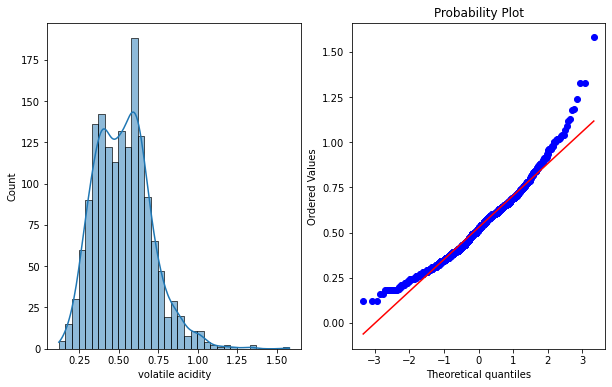

In [38]:
plot_data(df2,"volatile acidity")

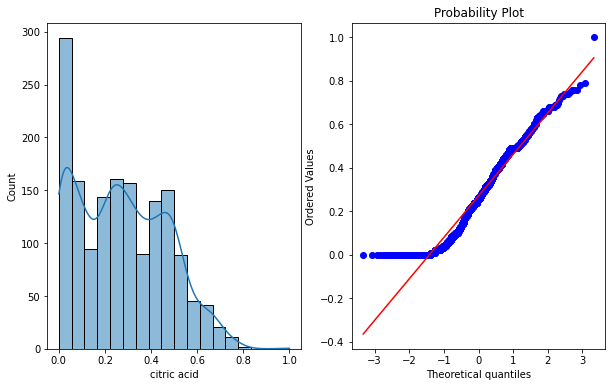

In [39]:
plot_data(df2,"citric acid")

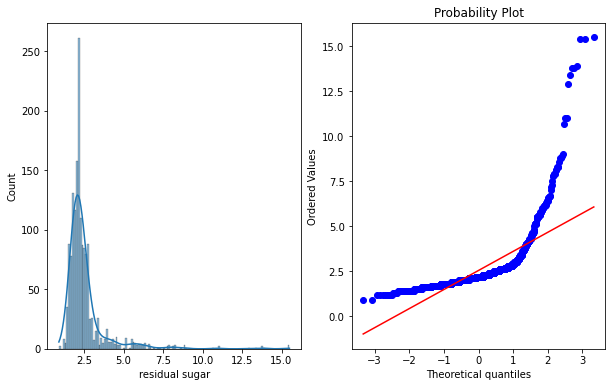

In [40]:
plot_data(df2,"residual sugar")

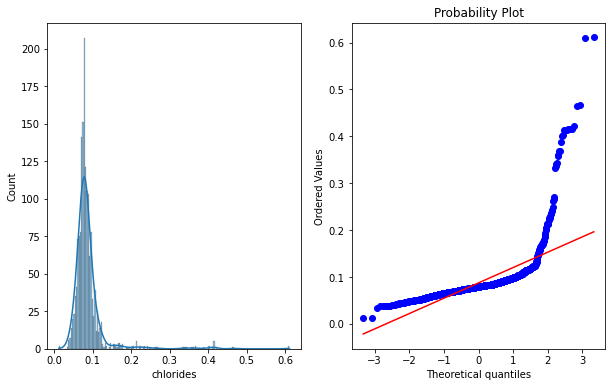

In [41]:
plot_data(df2,"chlorides")

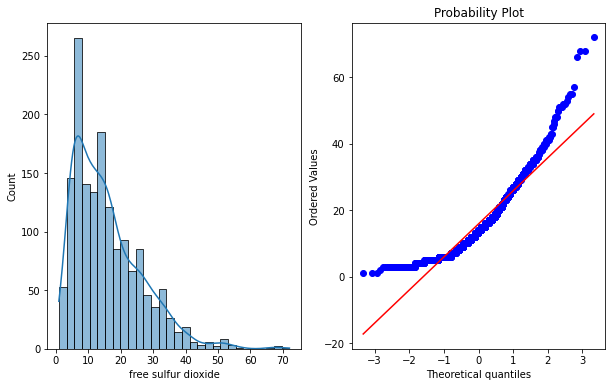

In [42]:
plot_data(df2,"free sulfur dioxide")

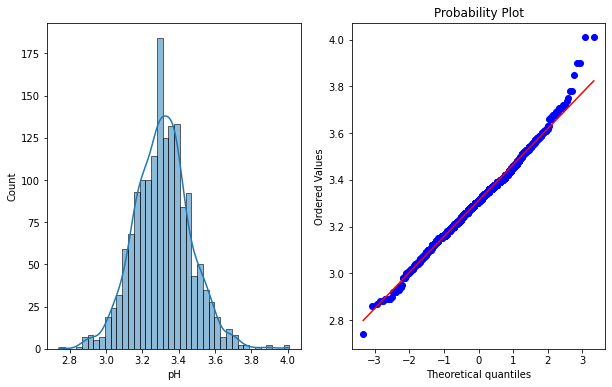

In [43]:
plot_data(df2,"pH")

### Insights

fixed acidity,alcohol,free sulphur dioxide,residual sugar are left skewed

volatile acidity and citric acid are not normally distributed

chlorides,density,ph and sulphates are normally distributed

Min-Max normalization: This technique scales the values of a feature to a range between 0 and 1. This is done by subtracting the minimum value of the feature from each value, and then dividing by the range of the feature.

Z-score normalization: This technique scales the values of a feature to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the feature from each value, and then dividing by the standard deviation.

Decimal Scaling: This technique scales the values of a feature by dividing the values of a feature by a power of 10.

Logarithmic transformation: This technique applies a logarithmic transformation to the values of a feature. This can be useful for data with a wide range of values, as it can help to reduce the impact of outliers.

Root transformation: This technique applies a square root transformation to the values of a feature. This can be useful for data with a wide range of values, as it can help to reduce the impact of outliers.

It’s important to note that normalization should be applied only to the input features, not the target variable, and that different normalization technique may work better for different types of data and models.

### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [49]:
# Import necessary libraries
from sklearn import datasets  # to retrieve the Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [50]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [51]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [52]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-1.779442,1.157303,-1.386581
1,-1.004185,2.071838,0.007759
2,-0.915783,1.393434,-0.699286
3,2.404077,-0.213792,0.066381
4,-1.779442,1.157303,-1.386581


## Minimum  9  principal components required to explain 90% of the variance in the data